# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [6]:
# Extract all rows of data
rows = soup.find_all('tr')
rows

[<tr>
 <th>id</th>
 <th>terrestrial_date</th>
 <th>sol</th>
 <th>ls</th>
 <th>month</th>
 <th>min_temp</th>
 <th>pressure</th>
 </tr>,
 <tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-2

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list

lista = []

# Loop through the scraped data to create a list of rows

for row in rows:
    columns =row.find_all('td')
    if columns:
        lista.append({
            'id':columns[0].text.strip(),
            'terrestrial_date':columns[1].text.strip(),
            'sol': columns[2].text.strip(),
            'ls': columns[3].text.strip(),
            'month': columns[4].text.strip(),
            'min_temp': columns[5].text.strip(),
            'pressure': columns[6].text.strip() 
        })

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

df= pd.DataFrame(lista)

In [9]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column 

print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [11]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = pd.to_numeric(df['sol'], downcast='integer')
df['ls'] = pd.to_numeric(df['ls'], downcast='integer')
df['month'] = pd.to_numeric(df['month'], downcast='integer')
df['min_temp'] = pd.to_numeric(df['min_temp'], downcast='float')
df['pressure'] = pd.to_numeric(df['pressure'], downcast='float')

In [12]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int16
ls                           int16
month                         int8
min_temp                   float32
pressure                   float32
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?

df['month'].nunique()

12

In [14]:
# 2. How many sols (Martian days) worth of data are there?
df['sol'].nunique()

1867

In [15]:
# 3. What is the average minimum temperature by month?
mean_temp = df.groupby('month')['min_temp'].mean()
mean_temp

month
1    -77.160919
2    -79.932587
3    -83.307289
4    -82.747421
5    -79.308723
6    -75.299316
7    -72.281693
8    -68.382980
9    -69.171638
10   -71.982140
11   -71.985504
12   -74.451805
Name: min_temp, dtype: float32

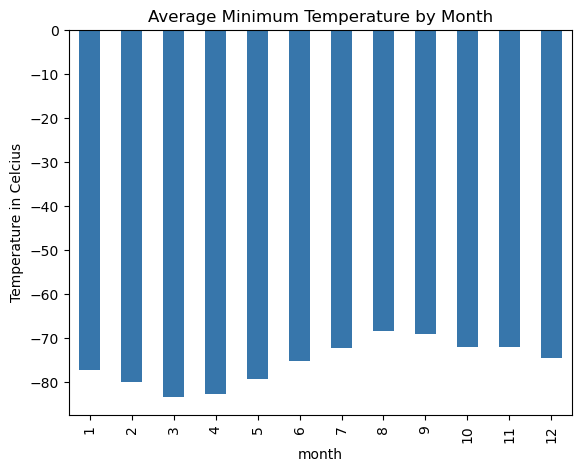

In [16]:
# Plot the average minimum temperature by month

plt.figure(figsize=(6.5,5))
mean_temp.plot(kind = 'bar', color = '#3776ab')
plt.title('Average Minimum Temperature by Month')
plt.xlabel('month')
plt.ylabel('Temperature in Celcius')
plt.show()


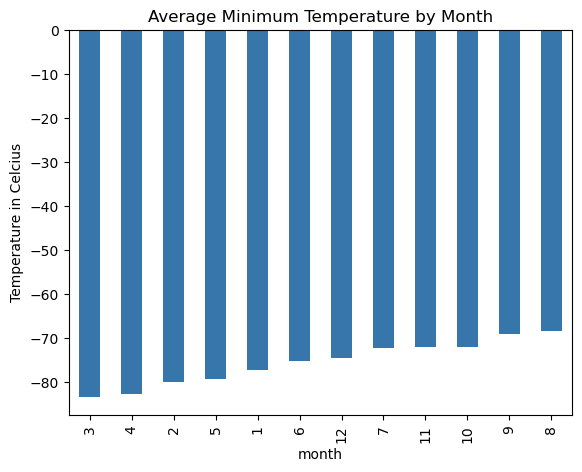

In [17]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

sort_values = mean_temp.sort_values()
plt.figure(figsize=(6.5,5))
sort_values.plot(kind = 'bar', color = '#3776ab')
plt.title('Average Minimum Temperature by Month')
plt.xlabel('month')
plt.ylabel('Temperature in Celcius')
plt.show()

In [18]:
# 4. What is the average pressure by month?
pressure_mean = df.groupby('month')['pressure'].mean()
pressure_mean

month
1     862.488525
2     889.455078
3     877.322937
4     806.329895
5     748.557068
6     745.054443
7     795.105652
8     873.829773
9     913.305969
10    887.312500
11    857.014465
12    842.156616
Name: pressure, dtype: float32

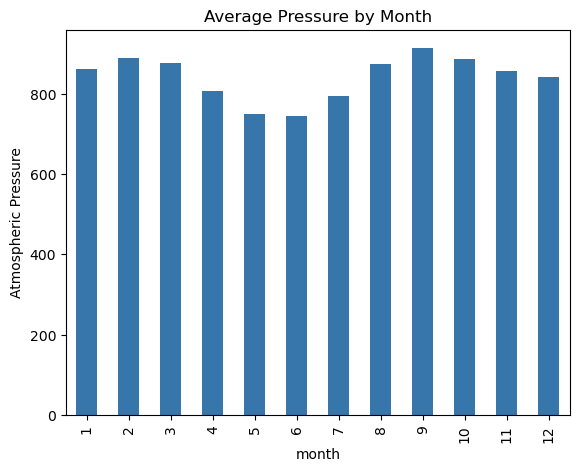

In [19]:
# Plot the average pressure by month
plt.figure(figsize=(6.5,5))
pressure_mean.plot(kind = 'bar', color = '#3776ab')
plt.title('Average Pressure by Month')
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')
plt.show()

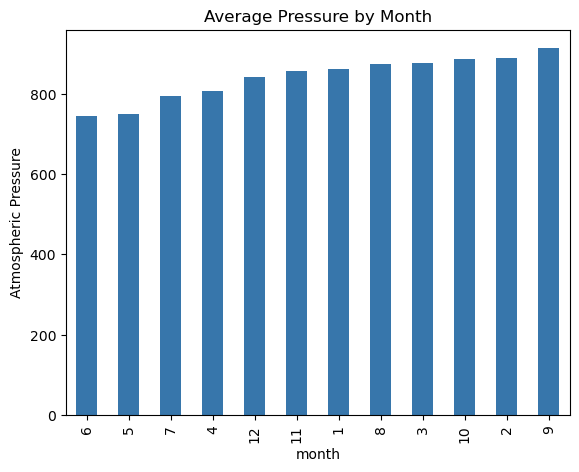

In [20]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sort_pressure = pressure_mean.sort_values()
plt.figure(figsize=(6.5,5))
sort_pressure.plot(kind = 'bar', color = '#3776ab')
plt.title('Average Pressure by Month')
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')
plt.show()

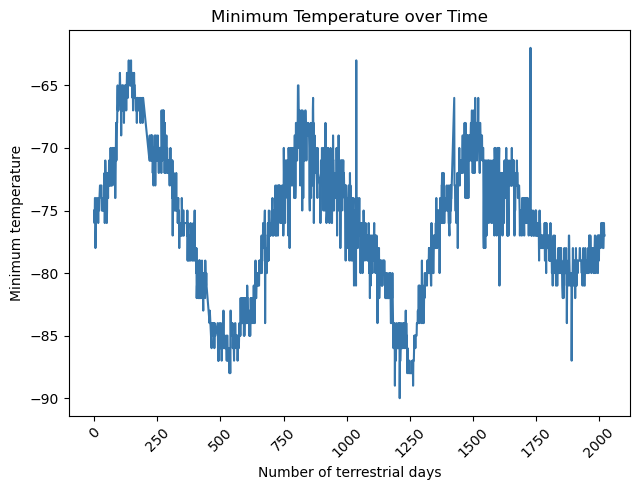

In [21]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
one_Martian_year_days = 687
start_date = df['terrestrial_date'].min()
df['terrestrial_days'] = (df['terrestrial_date'] - start_date).dt.days

plt.figure(figsize=(6.5,5))
plt.plot(df['terrestrial_days'], df['min_temp'], linestyle='-', color='#3776ab')

plt.title('Minimum Temperature over Time')
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Minimum Temperature

The data visualization reveals that the coldest months on Mars are March and April, when temperatures can plummet to below -80°C. In contrast, the average temperatures on Earth during March can vary significantly by region; however, the global average temperature for March 2024 was approximately 14.14°C.(resource:https://climate.copernicus.eu/march-2024-10th-consecutive-record-warm-month-globally)
The warmest month on Mars is August and the temperature is around -70°C.
Understanding the minimum temperatures on Mars is crucial for planning future missions and research, especially in the context of astronaut survival and the exploitation of planetary resources.

#### Atmospheric Pressure

The highest atmospheric pressure on Mars is observed in September, reaching approximately 900 pascals, while the lowest pressure occurs in June, at around 760 pascals. In comparison, the average atmospheric pressure at sea level on Earth is approximately 101,325 pascals. (resource:https://iridl.ldeo.columbia.edu/dochelp/QA/Basic/atmos_press.html)
Understanding the atmospheric pressure on Mars is crucial for planning future missions and research, especially in the context of astronaut survival and the exploitation of planetary resources.

#### Year Length

A Martian year is approximately 687 Earth days, nearly twice the length of an Earth year. This extended duration is due to Mars's greater distance from the Sun and its slower orbit. In analysis, I confirmed that one Martian year is approximately 687 Earth days. This was visually estimated by plotting the daily minimum temperature over time, observing the periodic changes consistent with Martian seasons. The estimate falls well within a 25% margin of accuracy, as the relationship between Martian and Earth days is well established in scientific literature.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [23]:
# Write the data to a CSV
df.to_csv('mars_data_analysis.csv', index=False)

In [24]:
browser.quit()